#Cyclone Image Classification using Transfer Learning

**#The Aim of this Notebook is to develop Cyclone Image Classification Model**

In [1]:
import matplotlib.pyplot as plt 
import keras,os
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from glob import glob
from keras.models import Model

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path='/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images'

#Random image of Severe Tropical Storm 

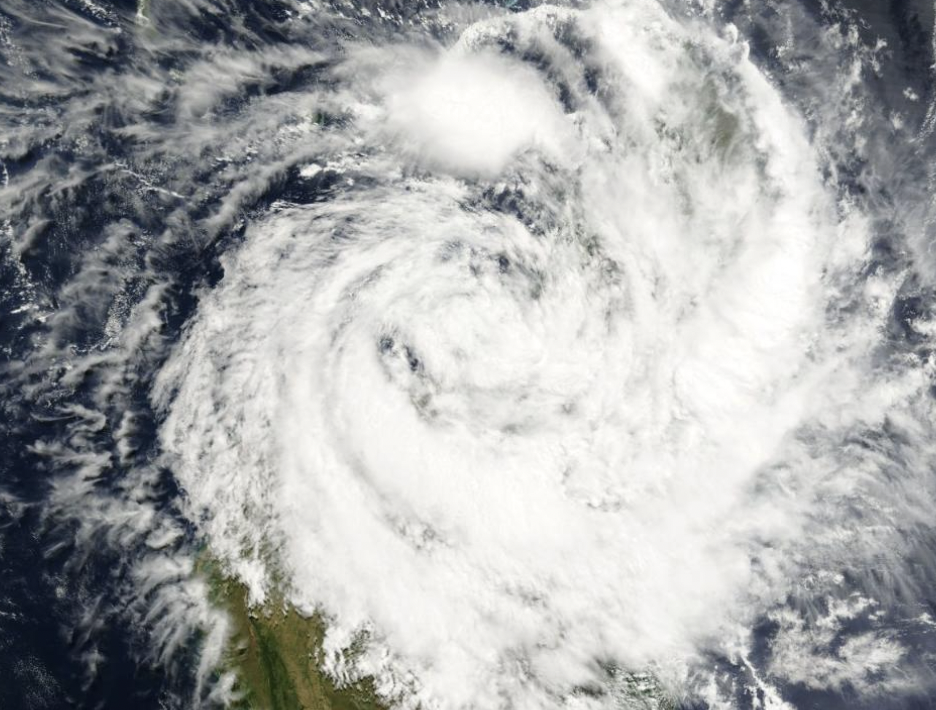

In [97]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Severe Tropical Storm/Screenshot 2022-01-31 at 10.13.23 PM.png')

#Image of - Tropical Depression

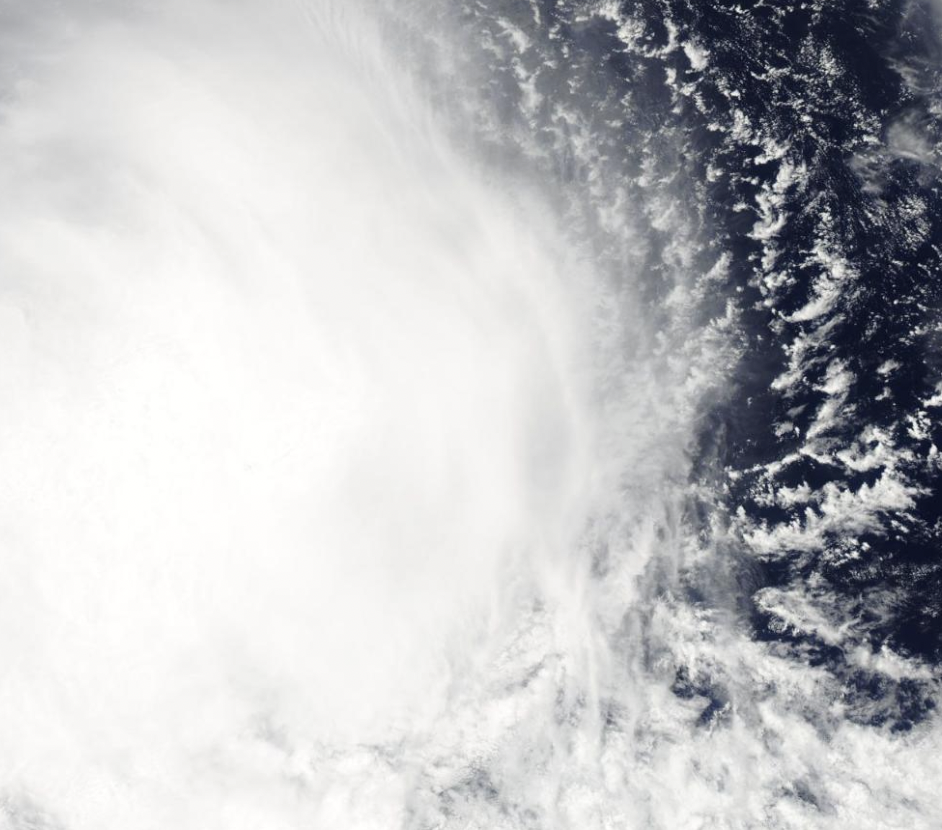

In [98]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Tropical Storm/Screenshot 2022-02-02 at 11.08.53 PM.png')

#Image of - Tropical Storm

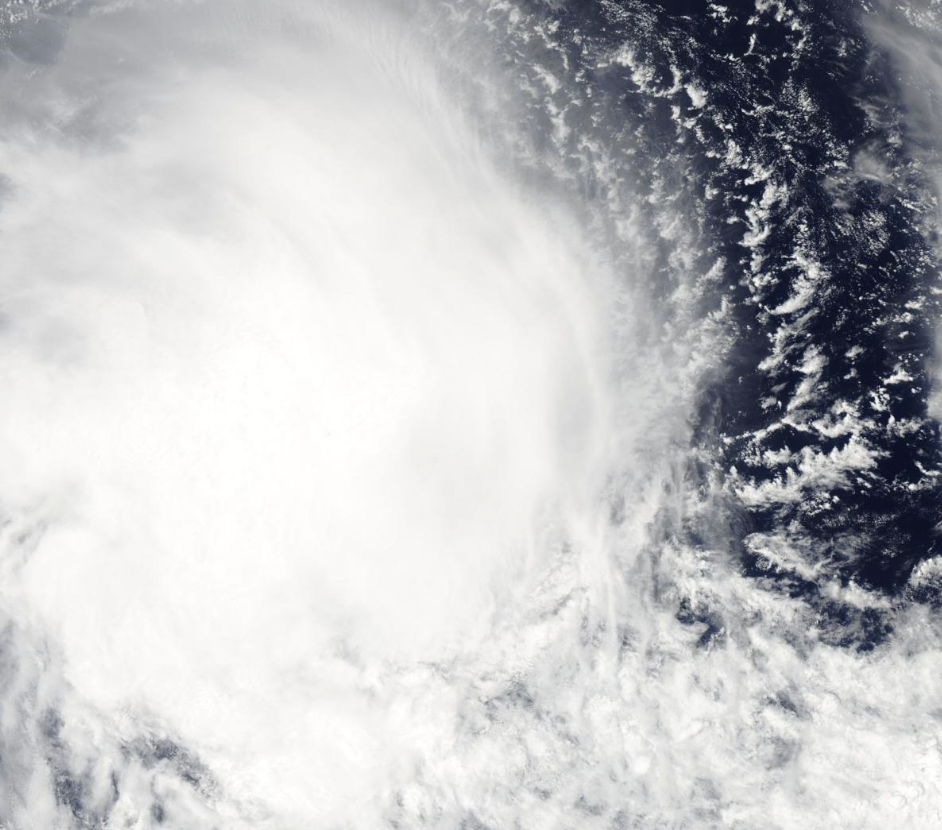

In [99]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Tropical Storm/Screenshot 2022-02-02 at 11.08.26 PM.png')

**Image of - Typhoon **

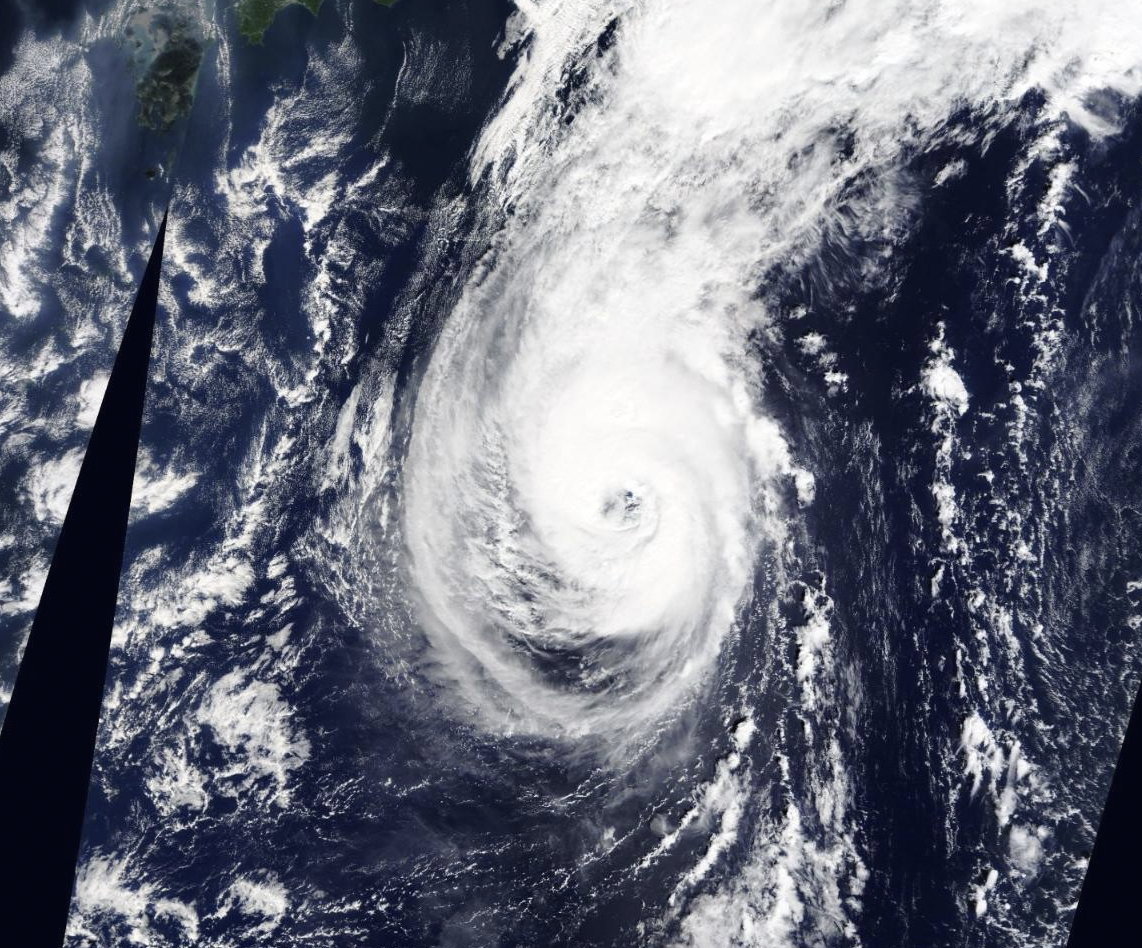

In [101]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Typhoon/Screenshot 2021-12-22 at 6.23.08 PM.png')

In [102]:
#Data PreProcessing

**Data PreProcessing**

In [9]:
training_datagenerator = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)

In [10]:
train_dataset=training_datagenerator.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train',
                                                         target_size=(224,224),
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         shuffle=True)

Found 160 images belonging to 4 classes.


In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3], dtype=int32)

In [12]:
train_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Storm': 2,
 'Typhoon': 3}

In [13]:
test_datagenrator=ImageDataGenerator(rescale = 1./255)

In [14]:
test_dataset=test_datagenrator.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test',
                                                        target_size=(224,224),
                                                        batch_size=1,
                                                        class_mode='categorical',
                                                        shuffle=False)

Found 80 images belonging to 4 classes.


In [ ]:
#vgg-16
#VGG=tf.keras.applications.vgg16.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
#VGG.trainable=False
#classifier=Sequential([VGG,keras.layers.Flatten(),
                       #keras.layers.Dense(units=256,activation="relu"),
                       #keras.layers.Dense(units=128,activation="relu"),
                       #keras.layers.Dense(units=4,activation="softmax")
#])


In [15]:
VGG=tf.keras.applications.vgg16.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')



58900480/58889256 [==============================] - 0s 0us/step


In [16]:
VGG.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [17]:
for layer in VGG.layers:
  layer.trainable=False

In [18]:
x=Flatten()(VGG.output)
prediction=Dense(units=4,activation="softmax")(x)
model=Model(inputs=VGG.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#Create Convolutional Neural Network to Classify the Cyclone Images

**Compile the Model**

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

**Training our model**

In [21]:
#hist=classifier.fit_generator(train_dataset,epochs=60,validation_data=train_dataset)
hist=model.fit_generator(train_dataset,epochs=60,validation_data=train_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/60
5/5 [==============================] - 106s 17s/step - loss: 1.8970 - accuracy: 0.3313 - val_loss: 1.3023 - val_accuracy: 0.3313
Epoch 2/60
5/5 [==============================] - 14s 3s/step - loss: 1.1463 - accuracy: 0.4938 - val_loss: 0.7517 - val_accuracy: 0.7500
Epoch 3/60
5/5 [==============================] - 14s 3s/step - loss: 0.6809 - accuracy: 0.6938 - val_loss: 0.4929 - val_accuracy: 0.8375
Epoch 4/60
5/5 [==============================] - 14s 3s/step - loss: 0.5063 - accuracy: 0.8438 - val_loss: 0.3238 - val_accuracy: 0.9000
Epoch 5/60
5/5 [==============================] - 14s 3s/step - loss: 0.3957 - accuracy: 0.8687 - val_loss: 0.3323 - val_accuracy: 0.8875
Epoch 6/60
5/5 [==============================] - 15s 3s/step - loss: 0.3319 - accuracy: 0.9125 - val_loss: 0.2556 - val_accuracy: 0.9375
Epoch 7/60
5/5 [==============================] - 14s 3s/step - loss: 0.2606 - accuracy: 0.9375 - val_loss: 0.2302 - val_accuracy: 0.9625
Epoch 8/60
5/5 [================

In [22]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
test_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Storm': 2,
 'Typhoon': 3}

In [24]:
predictions=model.predict(test_dataset)
predictions

array([[9.55881417e-01, 2.47854250e-03, 9.83860716e-03, 3.18014696e-02],
       [9.39057052e-01, 2.20041238e-02, 1.69086196e-02, 2.20301710e-02],
       [9.99195755e-01, 6.83711201e-04, 1.72462035e-06, 1.18871714e-04],
       [9.40694451e-01, 2.33342256e-02, 6.06809650e-03, 2.99032610e-02],
       [1.79493770e-01, 7.92608798e-01, 1.47744669e-02, 1.31229162e-02],
       [9.49552596e-01, 3.45861688e-02, 1.24432687e-02, 3.41790658e-03],
       [8.24362814e-01, 1.56072289e-01, 1.51142832e-02, 4.45062527e-03],
       [6.36591911e-02, 3.30098914e-07, 6.18992490e-04, 9.35721576e-01],
       [2.21374370e-02, 1.20000061e-06, 6.62236474e-03, 9.71239030e-01],
       [8.88402581e-01, 7.24113022e-07, 9.33771282e-02, 1.82195157e-02],
       [9.88556981e-01, 9.41536200e-06, 2.54393951e-03, 8.88968166e-03],
       [9.68370020e-01, 1.12977333e-03, 2.87547335e-02, 1.74544135e-03],
       [1.90876517e-02, 2.84635775e-07, 7.37709575e-04, 9.80174303e-01],
       [1.37176573e-01, 1.27429410e-03, 3.53178330e

In [25]:
predictions=np.argmax(predictions,axis=1)
predictions

array([0, 0, 0, 0, 1, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0])

In [103]:
Algorithm=[]
Accuracy=[]


In [109]:
#score = model.evaluate(train_dataset)
#Algorithm.append('VGG')
#Accuracy.append(score[1] * 100)
#print(Algorithm[-1] +  ': ', Accuracy[-1])

5/5 [==============================] - 7s 1s/step - loss: 0.0235 - accuracy: 1.0000
VGG:  100.0


In [105]:
test_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Storm': 2,
 'Typhoon': 3}

In [106]:
test_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Storm': 2,
 'Typhoon': 3}

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.6

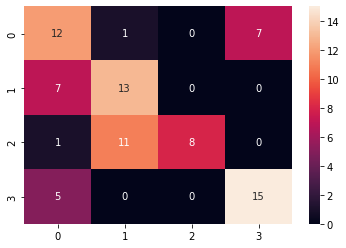

In [108]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_dataset.classes,predictions)
sns.heatmap(cm,annot=True)

In [110]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.48      0.60      0.53        20
           1       0.52      0.65      0.58        20
           2       1.00      0.40      0.57        20
           3       0.68      0.75      0.71        20

    accuracy                           0.60        80
   macro avg       0.67      0.60      0.60        80
weighted avg       0.67      0.60      0.60        80



Text(0, 0.5, 'Train and test loss ')

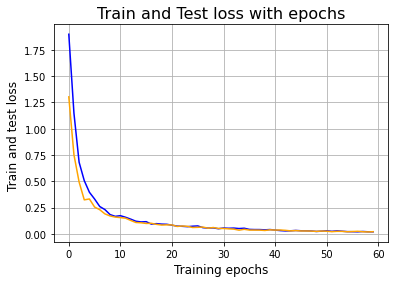

In [111]:
#ploting trsults with accuracy
plt.plot(hist.history['loss'],color='blue',label='train')
plt.plot(hist.history['val_loss'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test loss with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test loss ',fontsize=12)

Text(0, 0.5, 'Train and test accuracy')

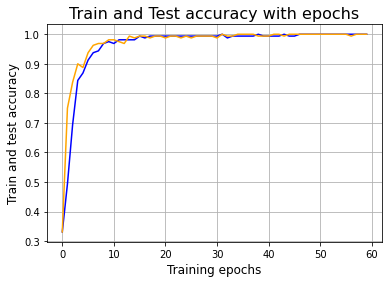

In [112]:
#ploting trsults with accuracy
plt.plot(hist.history['accuracy'],color='blue',label='train')
plt.plot(hist.history['val_accuracy'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test accuracy with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test accuracy',fontsize=12)

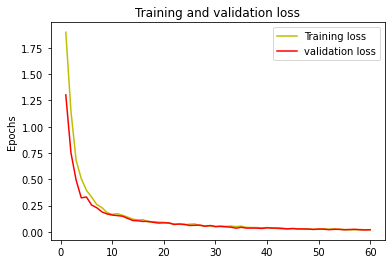

In [113]:
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('Training and validation loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [ ]:
#Prediction Using Trained Model

In [85]:
image=cv2.imread('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/sam_test/D.png')

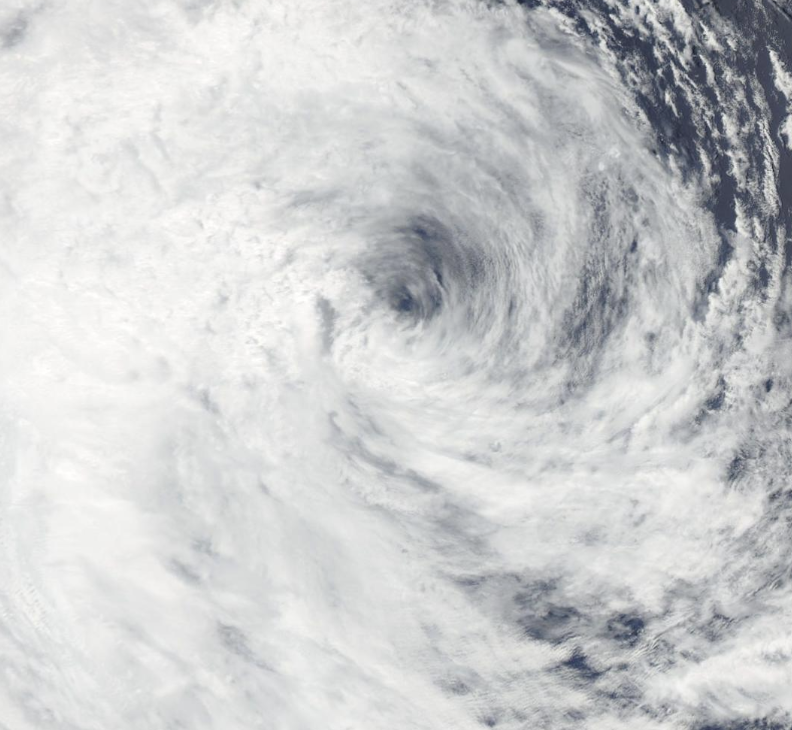

In [86]:
cv2_imshow(image)

In [87]:
image.shape

(730, 792, 3)

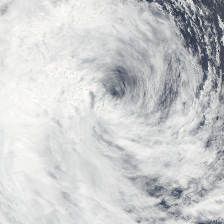

In [88]:
#reshape image
image=cv2.resize(image,(224,224))
cv2_imshow(image)

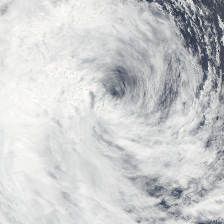

In [89]:
image=cv2.resize(image,(224,224))
cv2_imshow(image)

In [90]:
image

array([[[224, 224, 224],
        [225, 225, 225],
        [227, 227, 227],
        ...,
        [112, 105, 103],
        [ 89,  79,  77],
        [102,  90,  88]],

       [[222, 222, 222],
        [222, 222, 222],
        [224, 224, 224],
        ...,
        [ 99,  90,  88],
        [105,  93,  91],
        [109,  95,  93]],

       [[221, 221, 221],
        [219, 219, 219],
        [218, 218, 218],
        ...,
        [ 67,  57,  51],
        [ 94,  80,  75],
        [107,  92,  87]],

       ...,

       [[227, 228, 227],
        [230, 231, 230],
        [230, 231, 231],
        ...,
        [172, 165, 163],
        [170, 164, 161],
        [173, 169, 165]],

       [[215, 217, 215],
        [223, 224, 222],
        [235, 235, 234],
        ...,
        [138, 128, 126],
        [132, 128, 124],
        [179, 178, 174]],

       [[214, 215, 213],
        [212, 213, 211],
        [224, 225, 224],
        ...,
        [127, 117, 114],
        [182, 179, 175],
        [137, 135, 129]]

In [91]:
image=image/255

In [92]:
image

array([[[0.87843137, 0.87843137, 0.87843137],
        [0.88235294, 0.88235294, 0.88235294],
        [0.89019608, 0.89019608, 0.89019608],
        ...,
        [0.43921569, 0.41176471, 0.40392157],
        [0.34901961, 0.30980392, 0.30196078],
        [0.4       , 0.35294118, 0.34509804]],

       [[0.87058824, 0.87058824, 0.87058824],
        [0.87058824, 0.87058824, 0.87058824],
        [0.87843137, 0.87843137, 0.87843137],
        ...,
        [0.38823529, 0.35294118, 0.34509804],
        [0.41176471, 0.36470588, 0.35686275],
        [0.42745098, 0.37254902, 0.36470588]],

       [[0.86666667, 0.86666667, 0.86666667],
        [0.85882353, 0.85882353, 0.85882353],
        [0.85490196, 0.85490196, 0.85490196],
        ...,
        [0.2627451 , 0.22352941, 0.2       ],
        [0.36862745, 0.31372549, 0.29411765],
        [0.41960784, 0.36078431, 0.34117647]],

       ...,

       [[0.89019608, 0.89411765, 0.89019608],
        [0.90196078, 0.90588235, 0.90196078],
        [0.90196078, 0

In [93]:
image.shape

(224, 224, 3)

In [94]:
image=image.reshape(-1,224,224,3)
image.shape

(1, 224, 224, 3)

In [95]:
result =model.predict(image)
result

array([[1.8886699e-03, 9.5765531e-04, 9.9691248e-01, 2.4117518e-04]],
      dtype=float32)

In [96]:
result=np.argmax(result)
result

2

In [84]:
test_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Storm': 2,
 'Typhoon': 3}

In [ ]:
#The model correctly classified the input image as Tropical Strom.

In [ ]:
#Save and Load Model

In [ ]:
model_json=classifier.to_json()
with open('classifier.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
classifier_saved=save_model(classifier,'/content/weights.hdf5')

In [ ]:
with open('classifier.json','r') as json_file:
  json_saved_model=json_file.read()
json_saved_model